# **Proyecto Sprint 13 - Pronósticos de retención de un gimansio**

## **Descripción del proyecto**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Actividades a realizar:

* Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
* Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
* Analizar los factores que más impactan la pérdida.

* Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:

    * Identificar a los grupos objetivo.

    * Sugerir medidas para reducir la rotación.

    * Escribir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## **Diccionario de datos**

* Dataset: gym_chirn_us.csv

El dataset incluye los siguientes campos:

* 'Churn' — la cancelación para el mes en cuestión

Datos del usuario del mes anterior:

* 'gender' - genero del usuario.

* 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.

* 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).

* Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).

* 'Phone' — si el/la usuario/a aportó el número de teléfono.

* 'Age' - edad del usuario.

* 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:

* 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.

* 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.

* 'Group_visits' — si el/la usuario/a participa en sesiones grupales.

* 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.

* 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.

* 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

## **Objetivo**

Definir la estrategia de retención de clientes.

## **Análisis exploratorio de datos (EDA)**

### **Carga de librerías**

In [2]:
# Cargar todas las librerías

try:

    import pandas as pd
    import numpy as np
    import seaborn as sns   
    from matplotlib import pyplot as plt
    import plotly.express as px
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score
    from sklearn.ensemble import RandomForestClassifier
    from scipy.cluster.hierarchy import dendrogram, linkage
    from sklearn.cluster import KMeans
    print('Librerías cargadas con éxito')

except Exception as error:
    print('Error en carga de librerias', error)

Librerías cargadas con éxito


### **Carga del dataset**

In [3]:
# Carga de datasets

try:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

    print('Datasets cargados con éxito')

except:
    print('Error al cargar datasets')

Datasets cargados con éxito


In [4]:
# Info del dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# Muestra del dataset

print('Muestra del dataset:')

print()

print(data.head(5))

Muestra del dataset:

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequenc

Observaciones del dataset:

* 4000 registros en 14 columnas
* Los nombres de columnas tienen formato snake_case, sin embargo, se cambiaran a minúsculas.
* No existen datos ausentes
* Columna con variable objetivo: 'Churn'


In [6]:
# Cambiar a minúsculas los nombres de las columnas

data.columns = data.columns.str.lower()

print('Columnas en minúsculas:')

print(data.columns)

Columnas en minúsculas:
Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


In [7]:
# Valores promedio y desviación estándar de las variables numéricas

print('Valores promedio y desviación estándar de las variables numéricas:')

print()

print(data.describe().T[['mean', 'std']].round(2))

Valores promedio y desviación estándar de las variables numéricas:

                                     mean    std
gender                               0.51   0.50
near_location                        0.85   0.36
partner                              0.49   0.50
promo_friends                        0.31   0.46
phone                                0.90   0.30
contract_period                      4.68   4.55
group_visits                         0.41   0.49
age                                 29.18   3.26
avg_additional_charges_total       146.94  96.36
month_to_end_contract                4.32   4.19
lifetime                             3.72   3.75
avg_class_frequency_total            1.88   0.97
avg_class_frequency_current_month    1.77   1.05
churn                                0.27   0.44


In [8]:
# Valores promedio por 'Churn'

prom_cancelacion = data.groupby('churn').mean().round(2)

print('Valores promedio por "Churn":')

print()

print(prom_cancelacion)

Valores promedio por "Churn":

       gender  near_location  partner  promo_friends  phone  contract_period  \
churn                                                                          
0        0.51           0.87     0.53           0.35    0.9             5.75   
1        0.51           0.77     0.36           0.18    0.9             1.73   

       group_visits    age  avg_additional_charges_total  \
churn                                                      
0              0.46  29.98                        158.45   
1              0.27  26.99                        115.08   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                       5.28      4.71                       2.02   
1                       1.66      0.99                       1.47   

       avg_class_frequency_current_month  
churn                                     
0                                   2.03  
1

In [9]:
# Histogramas y distribuciones pareada de caracterisiticas por 'Churn'

# Grupos de datos

# 'Churn' = 0, clientes que NO cancelaron

churn_0 = data[data['churn'] == 0]

# 'Churn' = 1, clientes que SÍ cancelaron

churn_1 = data[data['churn'] == 1]

# Columnas

columnas = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
            'contract_period', 'group_visits', 'age',
            'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
            'avg_class_frequency_total', 'avg_class_frequency_current_month']

Distribución de las características por "NO cancelados (azul) / SI cancelados (naranja)":


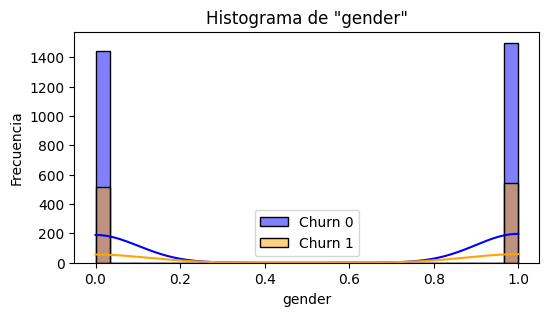

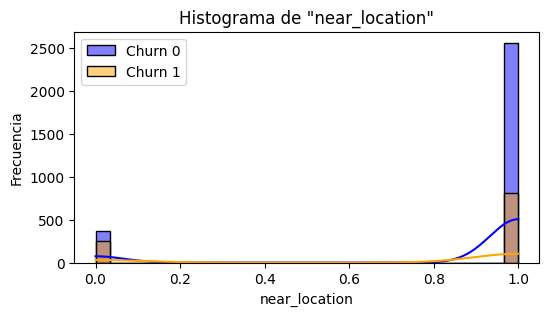

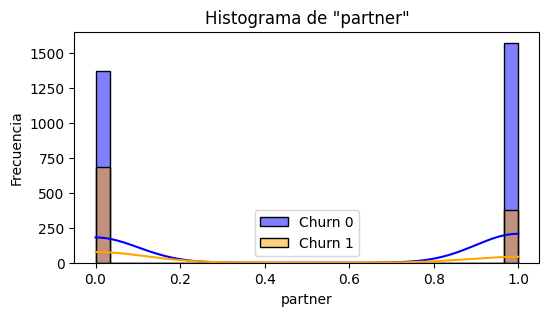

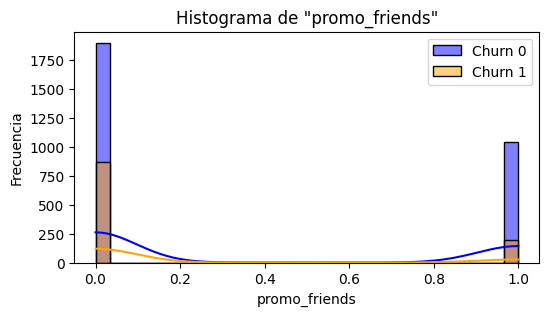

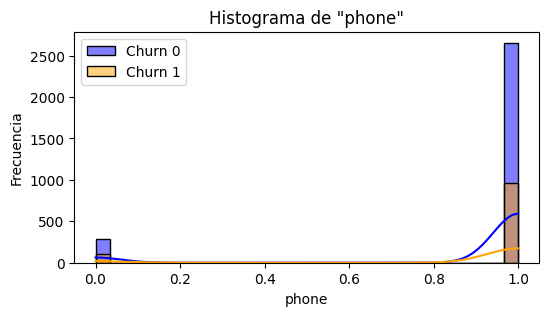

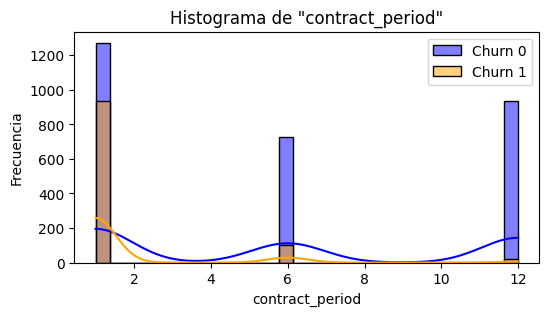

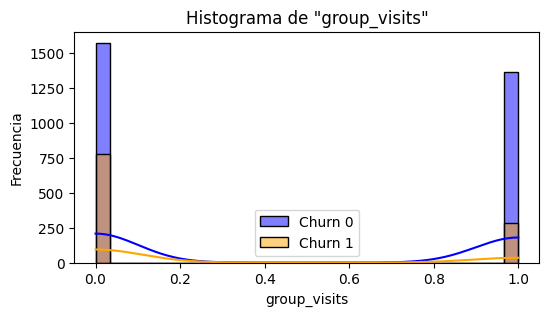

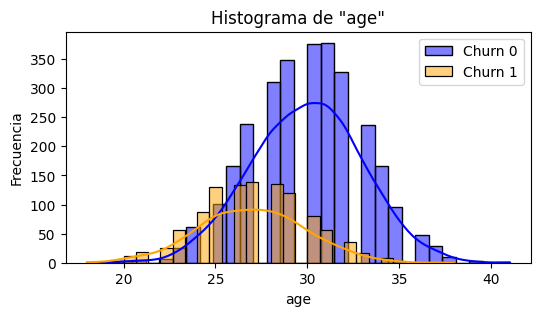

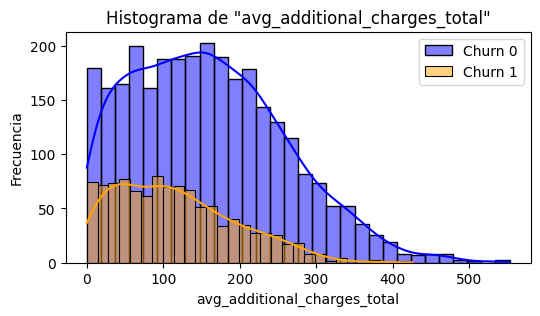

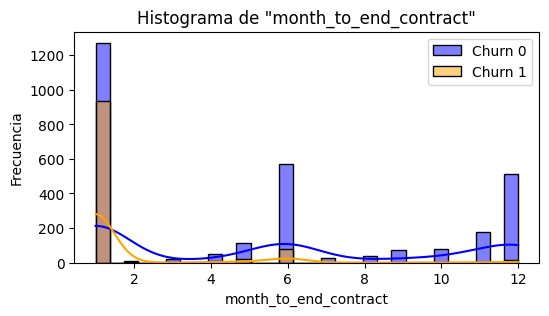

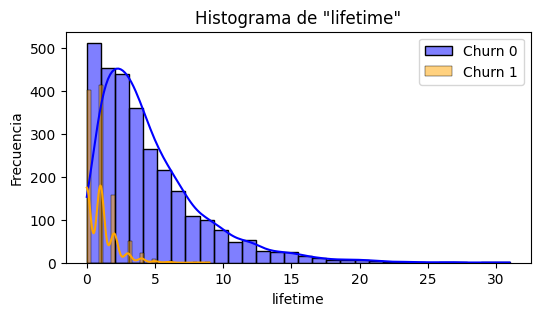

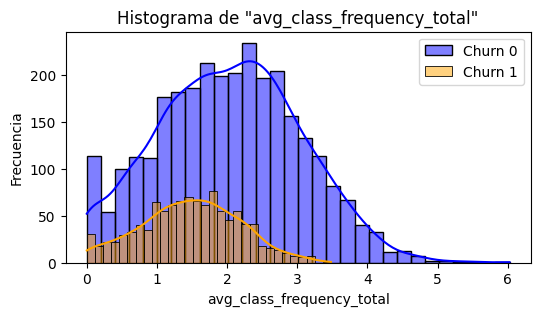

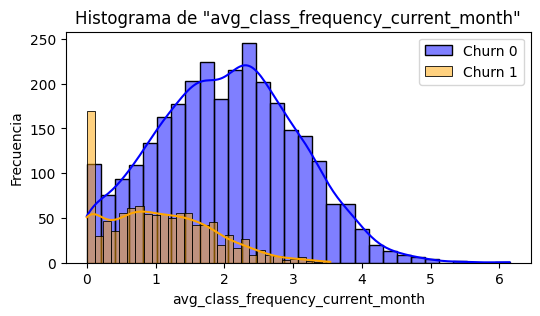

In [10]:
# Histogramas y distribuciones pareada de caracterisiticas por 'Churn 0'

print('Distribución de las características por "NO cancelados (azul) / SI cancelados (naranja)":')

# Histogramas

for col in columnas:
    plt.figure(figsize=(6, 3))
    sns.histplot(churn_0[col], kde=True, bins=30, color='blue', label='Churn 0')
    sns.histplot(churn_1[col], kde=True, bins=30, color='orange', label='Churn 1')
    plt.legend()
    plt.title(f'Histograma de "{col}"')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

Observaciones de las distribuciones:

* Tanto en el grupo de los usuarios que no cancelaron y los que cancelaron tienen una distribución similar por género.
* En ambos grupos la mayoría de los usuarios viven cercanos a la ubicación del gimnasio.
* En el grupo de los que no han cancelado existe una proporción similar de los que se registraron por el plan de “partners”, sin embargo, en el grupo de los que cancelan, existe una mayor proporción en los usuarios que no se registraron por este plan.
* En cuanto al plan “promo Friends”, en ambos grupos existe una mayor proporción de usuarios que no se registraron.
* El número de teléfono es compartido por la mayoría de los usuarios de ambos grupos.
* Por la duración del contrato, es notable que los usuarios que cancelaron se encuentran mayormente en el período de 1 mes, por otra parte, los que no cancelan, tienen una mayor participación en los períodos de 12 y 6 meses.
* Poco menos de la mitad de los usuarios que no cancelan realizan actividades grupales, por otra parte, en el grupo que cancela la proporción es más baja.
* La media de edad de los usuarios que no cancelan se encuentra entre los 30 y 32 años, en cuando al grupo que cancela, se encuentra entre 26 y 28 años.
* Los usuarios que nos cancelan sueles invertir en adicionales durante sus visitas, en promedio \$ 158.45, los que cancelan \$ 115.08
* El tiempo de vida del usuario del grupo que no cancela oscila mayormente entre 1 y 4 meses, de los usuarios que cancelan se encuentra en 1 mes.
* En promedio los usuarios que no cancelan toman 2.5 clases a la semana y el mes, los usuarios que cancelan 1.5 clases a la semana y menos de 1 al mes.


In [11]:
# Boxplots

# Columnas boxplots

columnas = ['age',
            'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
            'avg_class_frequency_total', 'avg_class_frequency_current_month']

print('Gráficos de caja de las características por "NO cancelados (churn 0)":')

print()

for col in columnas:
    fig = px.box(y=churn_0[col],  width=600, height=600)
    fig.update_traces(marker_color='blue')
    fig.update_layout(title_text=f'Gráfico de caja de "{col}"')
    fig.update_yaxes(title_text=col)
    fig.update_xaxes(title_text='Frecuencia')
    fig.show()

Gráficos de caja de las características por "NO cancelados (churn 0)":



In [12]:
# Boxplots

# Columnas boxplots

print('Gráficos de caja de las características por "SI cancelados (churn 1)":')

print()

for col in columnas:
    fig = px.box(y=churn_1[col],  width=600, height=600)
    fig.update_traces(marker_color='orange')
    fig.update_layout(title_text=f'Gráfico de caja de "{col}"')
    fig.update_yaxes(title_text=col)
    fig.update_xaxes(title_text='Frecuencia')
    fig.show()

Gráficos de caja de las características por "SI cancelados (churn 1)":



Observaciones de datos atípicos:

Grupo de usuarios que no cancelan:

* ‘age’ no presenta una cantidad fuerte de datos atípicos.
* ‘avg_additional_charges_total’ presenta montos por arriba del 3 cuartil, sin embargo, no es una cantidad considerable.
* ‘lifetime’ presenta una mayor cantidad de datos atípicos.

Grupo de usuarios que si cancelan:

* ‘month_to_end_contract’ la mayoría de los datos se encuentran en el valor 1, presentando algunos valores atípicos, de igual forma ‘lifetime’  esta contenido en el valor de 1 mes.


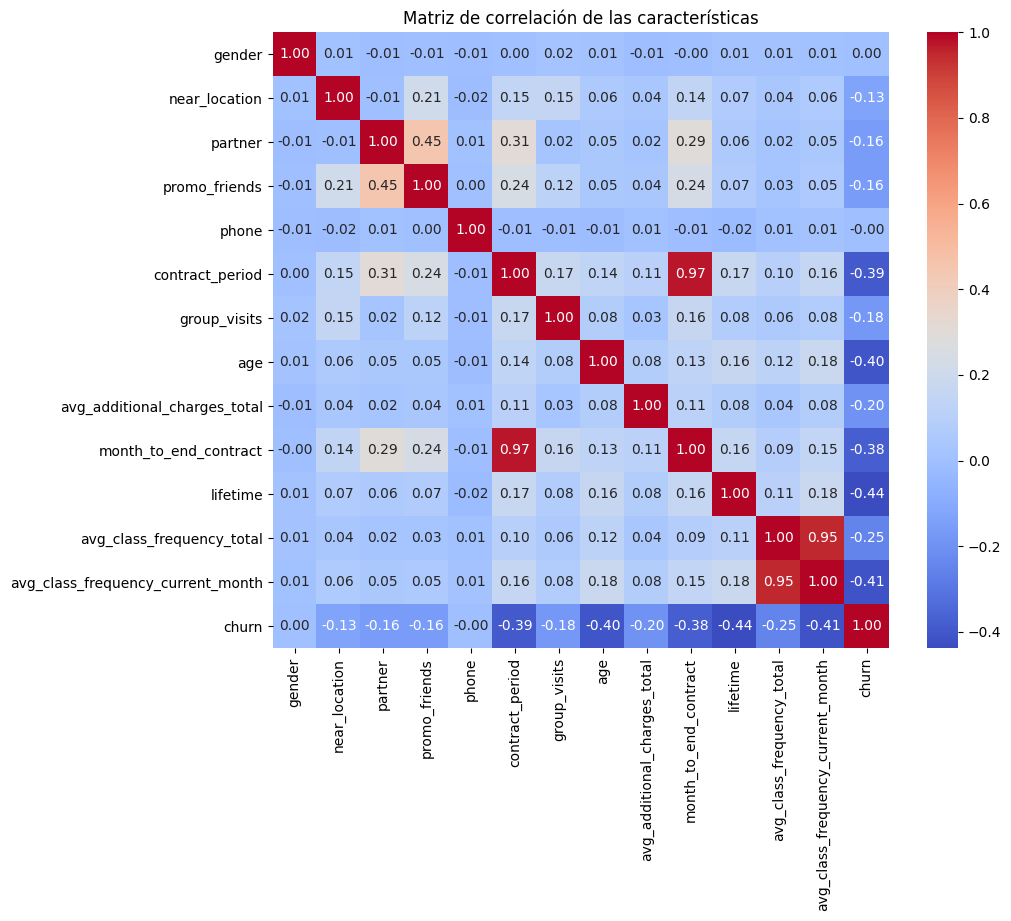

In [13]:
# Matriz de correlación

print()

corr_0 = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_0, annot=True, square= True, cmap='coolwarm', fmt='.2f')


plt.title('Matriz de correlación de las características')
plt.show()

Observaciones matriz de correlación:

* La correlación más fuerte (0.97) la presentan las características ’contract_period’ y ‘month_to_end_contract’, es decir, de acuerdo con el período contratado, serán los meses donde es posible que se genere una cancelación.
* La segunda correlación con más fuerza (0.95) la presentan las características ‘avg_class_frequency_current_month’ y ‘avg_class_frequency_total’, es decir, de acuerdo con el número de visitas semanales, podría deducirse cuantas veces asistirá al mes, en consecuencia, la tendencia a cancelar o no después del primer mes.
* El resto de las correlaciones no presentan una relación tan fuerte.


## **Modelo de predicción de cancelación de usuarios**

Se crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

### **Modelo: regresión logística**

#### **División de los datos**

In [14]:
# División de las características (X) y la variable objetivo (y)

X = data.drop('churn', axis=1)

y = data['churn']

# División de los datos en conjuntos de entrenamiento (train) y prueba (test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### **Entrenamiento y prueba**

In [15]:
# Entrenamiento y prueba del modelo

# algoritmo del modelo

lr_model = LogisticRegression(random_state=0)

# Entrenamiento del modelo

lr_model.fit(X_train, y_train)

# Predicción binaria

lr_predicciones = lr_model.predict(X_test)

lr_probabilidades = lr_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo

print('Evaluación del modelo Regresión Logística:')

print()

print('Exactitud: {:.2f}'.format(accuracy_score(y_test, lr_predicciones)))
print('Precisión: {:.2f}'.format(precision_score(y_test, lr_predicciones)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicciones)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, lr_probabilidades)))

Evaluación del modelo Regresión Logística:

Exactitud: 0.92
Precisión: 0.87
Recall: 0.81
ROC_AUC: 0.96



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [16]:
# Mostrar las probabilidades de las predicciones

print('Muestra de las probabilidades de cancelación por cliente (pronosticos):')

print()

print(lr_probabilidades[:10])

Muestra de las probabilidades de cancelación por cliente (pronosticos):

[0.00272069 0.9751469  0.44715588 0.96261087 0.02260867 0.00370153
 0.06612187 0.00344996 0.06899139 0.00660452]


In [17]:
# Promedio general de las probabilidades de cancelación por cliente

print('Promedio general de las probabilidades de cancelación por cliente (pronosticos):')

print()

print('Promedio: {:.2f}'.format(lr_probabilidades.mean()))
print('Desviación estándar: {:.2f}'.format(lr_probabilidades.std()))

Promedio general de las probabilidades de cancelación por cliente (pronosticos):

Promedio: 0.25
Desviación estándar: 0.36


In [34]:
# Importancia de las características del modelo

#lr_importancia = pd.DataFrame({'Característica': X.columns, 'Importancia': lr_model.coef_[0]})

#lr_importancia = lr_importancia.sort_values(by='Importancia', ascending=False)

#print('Importancia de las características del modelo Regresión Logística:')

#print()

#print(lr_importancia)

### **Modelo: bosque aleatorio**

#### **Entrenamiento y prueba**

In [19]:
# Entrenamiento y prueba del modelo

# algoritmo del modelo

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenamiento del modelo

rf_model.fit(X_train, y_train)

# Predicción binaria

rf_predicciones = rf_model.predict(X_test)

rf_probabilidades = rf_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo

print('Evaluación del modelo Random Forest:')

print()

print('Exactitud: {:.2f}'.format(accuracy_score(y_test, rf_predicciones)))
print('Precisión: {:.2f}'.format(precision_score(y_test, rf_predicciones)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predicciones)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, lr_probabilidades)))

Evaluación del modelo Random Forest:

Exactitud: 0.92
Precisión: 0.84
Recall: 0.82
ROC_AUC: 0.96



In [20]:
# Mostrar las probabilidades de las predicciones

print('Muestra de las probabilidades de cancelación por cliente (pronosticos):')

print()

print(rf_probabilidades[:10])

Muestra de las probabilidades de cancelación por cliente (pronosticos):

[0.   1.   0.25 0.95 0.07 0.03 0.01 0.   0.75 0.03]


In [21]:
# Promedio general de las probabilidades de cancelación por cliente

print('Promedio general de las probabilidades de cancelación por cliente (pronosticos):')

print()

print('Promedio: {:.2f}'.format(rf_probabilidades.mean()))
print('Desviación estándar: {:.2f}'.format(rf_probabilidades.std()))

Promedio general de las probabilidades de cancelación por cliente (pronosticos):

Promedio: 0.26
Desviación estándar: 0.33


#### **Importancia de las características del modelo**

In [22]:
# Importancia de las características del modelo

rf_importancia = pd.DataFrame(data = {'Característica': X.columns, 'Importancia': rf_model.feature_importances_})

rf_importancia = rf_importancia.sort_values(by='Importancia', ascending=False)

print('Importancia de las características del modelo Random Forest:')

print()

print(rf_importancia)

Importancia de las características del modelo Random Forest:

                       Característica  Importancia
10                           lifetime     0.276499
12  avg_class_frequency_current_month     0.180170
11          avg_class_frequency_total     0.129883
7                                 age     0.119129
8        avg_additional_charges_total     0.091473
9               month_to_end_contract     0.068855
5                     contract_period     0.065964
6                        group_visits     0.015652
0                              gender     0.012425
2                             partner     0.012285
3                       promo_friends     0.012053
1                       near_location     0.009421
4                               phone     0.006192


Comentarios de los modelos de predicción:

* El modelo Random Forest presenta mejores resultados en las métricas, con una mejor exactitud del 0.92, precisión del 0.84, recall del 0.82 y ROC_AUC del 0.96. Tanto recall como ROC_AUC es similar en ambos modelos. 

* 26% probabilidad promedio de cancelación (engloba todos los usuarios, la probabilidad esta calculada por usuario).

* La característica principal definida en el modelo Random Fores es ‘lifetime’, es decir, el tiempo que llevan registrados en el gimnasio tiene el mayor peso para definir la proyección de cancelación. 


## **Crear clústeres de usuarios/as**

### **Estandarizar los datos**

In [23]:
# Eliminar columnas categóricas

data_2 = data.drop('churn', axis = 1)


# Entrenar StandardScaler

scaler = StandardScaler()


# Transformar los datos de entrenamiento y pruebas

X_st = scaler.fit_transform(data_2)

print('Muestra de los datos transformados:')

print()

print(X_st[:5])

Muestra de los datos transformados:

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]]


### **Matriz de distancias**

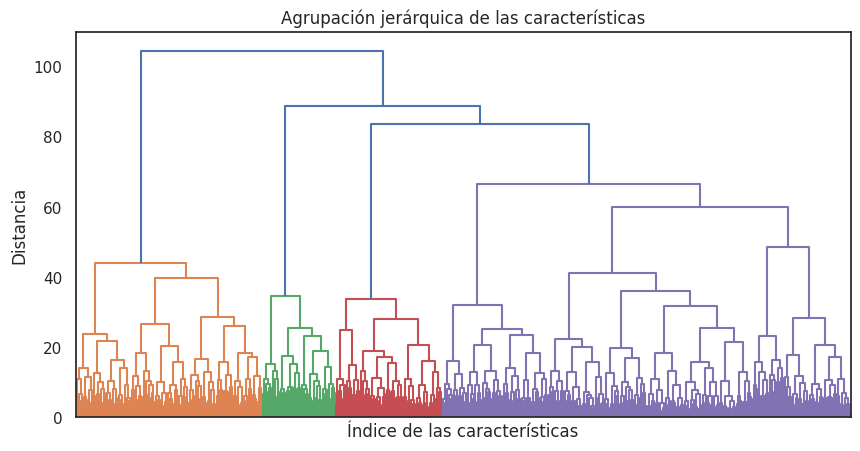

In [33]:
# Matriz de distancias

linked = linkage(X_st, method='ward')

# Crear dendograma

plt.figure(figsize=(10, 5))

dendrogram(linked, orientation = 'top')

plt.title('Agrupación jerárquica de las características')

plt.xlabel('Índice de las características')
plt.ylabel('Distancia')

plt.xticks([]) # Ocultar las etiquetas del eje x

plt.show()

### **Definir clústeres**

In [25]:
# Definir el modelo k_means con 5 clústeres

km = KMeans(n_clusters=5, random_state=0)

# Predecir los clústeres para los datos de entrenamiento

labels = km.fit_predict(X_st)

# Almacenar los resultados en el dataset

data_2['cluster_km'] = labels

print('Muestra de los datos con los clústeres:')

print()

print(data_2.head(5))

Muestra de los datos con los clústeres:

   gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total 

### **Valores medios de características**

In [26]:
# Calcular los valores promedio de características por clúster

prom_cluster = data_2.groupby('cluster_km').mean().round(2)

print('Valores promedio de características por clúster:')

print()

print(prom_cluster.head())

Valores promedio de características por clúster:

            gender  near_location  partner  promo_friends  phone  \
cluster_km                                                         
0             0.50           0.96     0.78           0.57    1.0   
1             0.52           0.86     0.47           0.31    0.0   
2             0.50           0.00     0.46           0.08    1.0   
3             0.49           1.00     0.35           0.24    1.0   
4             0.56           0.98     0.36           0.23    1.0   

            contract_period  group_visits    age  \
cluster_km                                         
0                     10.89          0.54  29.98   
1                      4.79          0.43  29.30   
2                      2.35          0.22  28.48   
3                      1.95          0.34  28.17   
4                      2.67          0.47  30.13   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km                     

### **Distribuciones de características por clústeres**

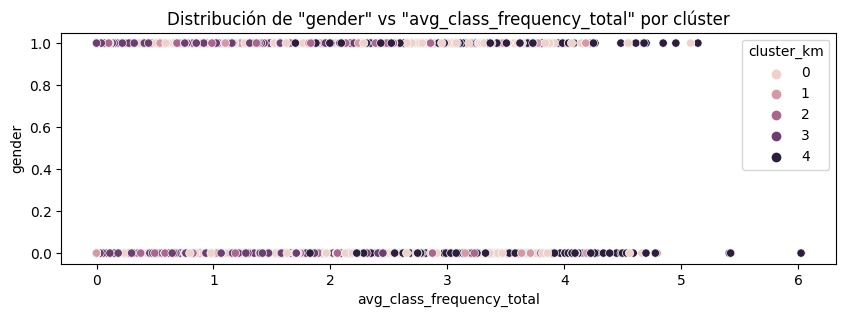

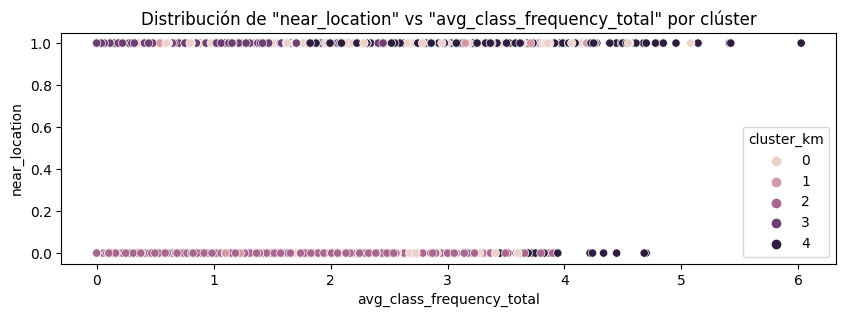

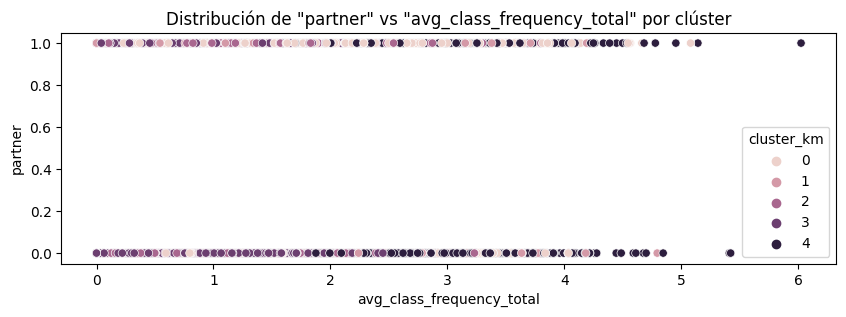

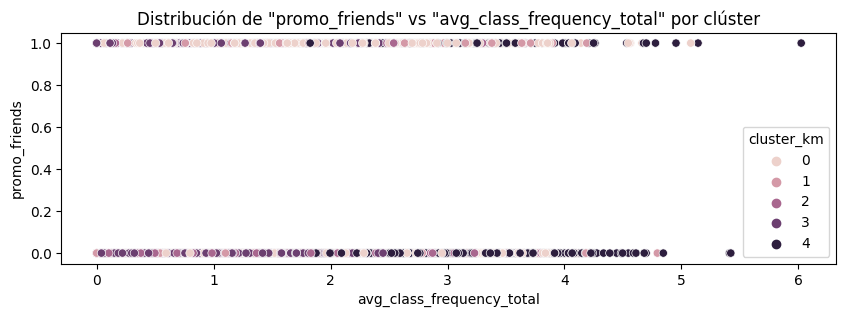

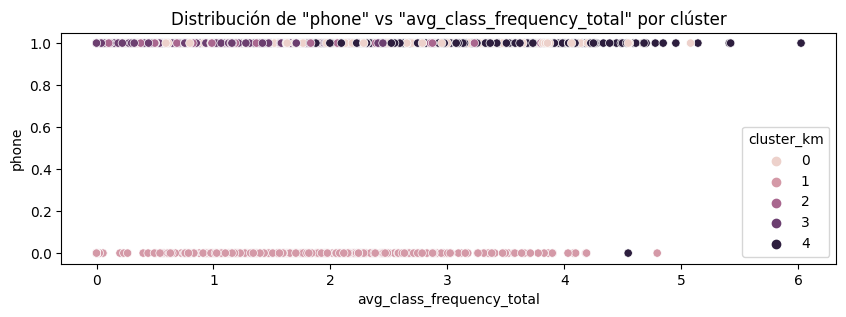

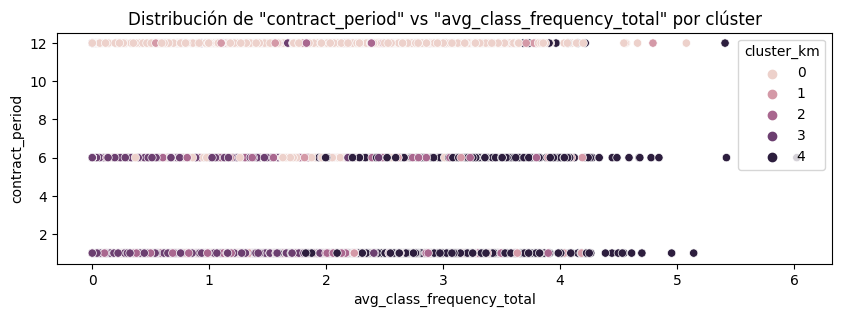

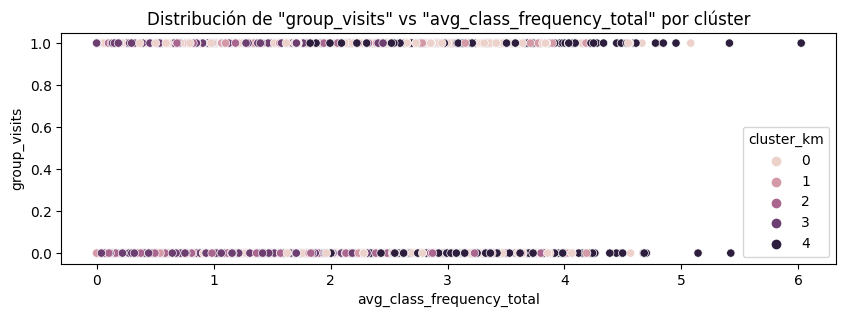

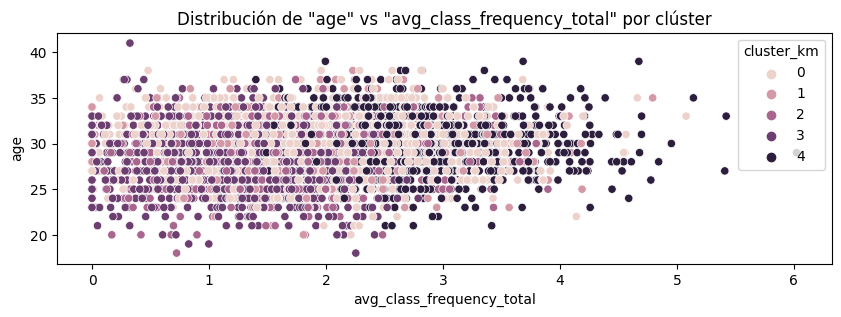

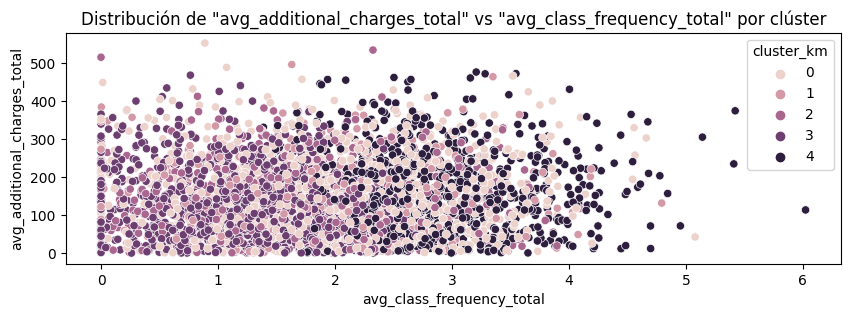

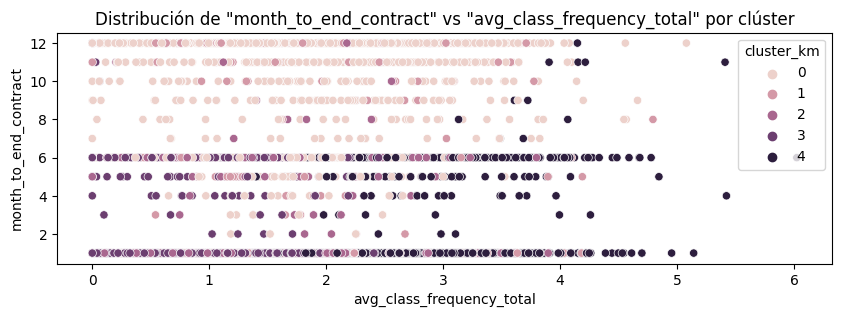

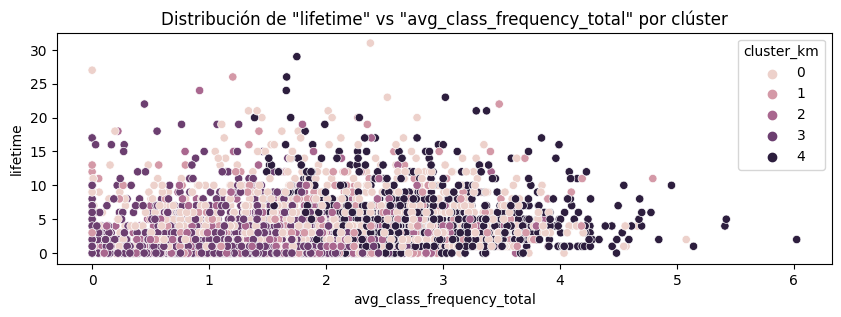

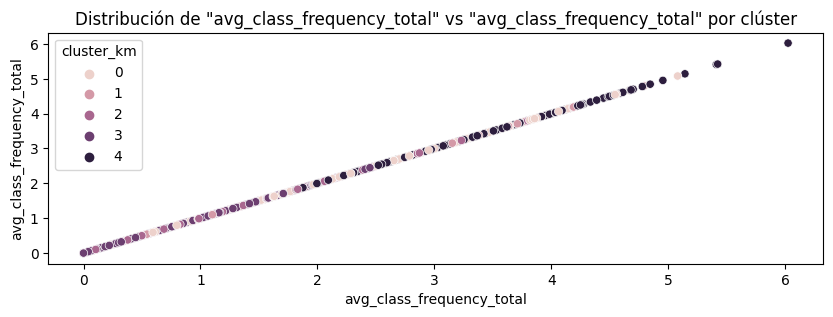

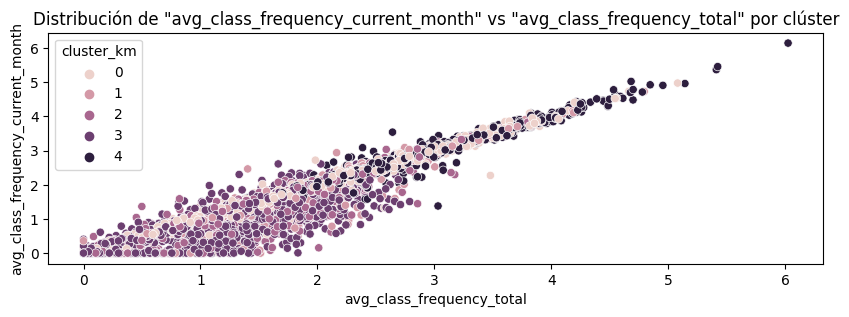

In [27]:
# Distribución de las características por clúster

for col in data_2.columns:
    if col != 'cluster_km':
        plt.figure(figsize=(10, 3))
        sns.scatterplot(x=data_2['avg_class_frequency_total'],
                        y=data_2[col], hue='cluster_km', data=data_2)
        plt.title(f'Distribución de "{col}" vs "avg_class_frequency_total" por clúster')
        plt.xlabel('avg_class_frequency_total')
        plt.ylabel(col)
        plt.show()

Comentarios:

* Se realizó el pareo de la característica 'avg_class_frequency_total' (promedio de visitas total) con el resto de las características encontrando lo siguiente:

* ‘near location’, ‘contract_period’, ‘month_to_end_contract’ paracen ser características limítrofes entre los clústeres, el resto de las características no presentan mayor diferencia, es decir, son similares entre los clústeres.


### **Tasa de cancelación de los clústeres**

In [28]:
# Agrupar los datos por clúster y lifetime

usuarios = data_2.pivot_table(index = 'lifetime', columns= 'cluster_km', values= 'age', aggfunc='count').reset_index()

usuarios.columns = ['lifetime','cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']

usuarios = usuarios.fillna(0)

print(usuarios)

    lifetime  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
0          0       33.0       55.0       90.0      270.0       39.0
1          1      148.0       74.0      132.0      362.0      127.0
2          2      146.0       55.0       90.0      202.0      117.0
3          3      151.0       46.0       49.0      131.0      113.0
4          4      130.0       38.0       43.0       95.0       77.0
5          5       83.0       23.0       27.0       58.0       82.0
6          6       79.0       16.0       19.0       46.0       60.0
7          7       60.0       11.0       16.0       29.0       51.0
8          8       30.0       13.0       13.0       15.0       40.0
9          9       37.0       12.0        8.0       16.0       27.0
10        10       29.0       14.0        3.0        9.0       21.0
11        11       18.0        6.0        2.0        6.0       16.0
12        12       18.0        7.0        3.0        6.0       19.0
13        13       11.0        4.0        2.0   

In [29]:
# Calcular la tasa de cancelación por clúster

usuarios['cluster_0_r'] = usuarios['cluster_0'].shift(1)

usuarios['cluster_1_r'] = usuarios['cluster_1'].shift(1)

usuarios['cluster_2_r'] = usuarios['cluster_2'].shift(1)

usuarios['cluster_3_r'] = usuarios['cluster_3'].shift(1)

usuarios['cluster_4_r'] = usuarios['cluster_4'].shift(1)

usuarios = usuarios.fillna(0)

usuarios['cluster_0_churn_%'] = round((1 - (usuarios['cluster_0_r'] / usuarios['cluster_0']))*100,2)

usuarios['cluster_1_churn_%'] = round((
    1 - (usuarios['cluster_1_r'] / usuarios['cluster_1']))*100,2)

usuarios['cluster_2_churn_%'] = round((
    1 - (usuarios['cluster_2_r'] / usuarios['cluster_2']))*100,2)

usuarios['cluster_3_churn_%'] = round((
    1 - (usuarios['cluster_3_r'] / usuarios['cluster_3']))*100,2)

usuarios['cluster_4_churn_%'] = round((
    1 - (usuarios['cluster_4_r'] / usuarios['cluster_4']))*100,2)


print(usuarios.head())

   lifetime  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  \
0         0       33.0       55.0       90.0      270.0       39.0   
1         1      148.0       74.0      132.0      362.0      127.0   
2         2      146.0       55.0       90.0      202.0      117.0   
3         3      151.0       46.0       49.0      131.0      113.0   
4         4      130.0       38.0       43.0       95.0       77.0   

   cluster_0_r  cluster_1_r  cluster_2_r  cluster_3_r  cluster_4_r  \
0          0.0          0.0          0.0          0.0          0.0   
1         33.0         55.0         90.0        270.0         39.0   
2        148.0         74.0        132.0        362.0        127.0   
3        146.0         55.0         90.0        202.0        117.0   
4        151.0         46.0         49.0        131.0        113.0   

   cluster_0_churn_%  cluster_1_churn_%  cluster_2_churn_%  cluster_3_churn_%  \
0             100.00             100.00             100.00             100.00

In [30]:
# Tabla dinámica de la tasa de cancelación por clúster

tabla_churn = usuarios.groupby('lifetime').agg({'cluster_0_churn_%': 'sum','cluster_1_churn_%': 'sum','cluster_2_churn_%':'sum', 'cluster_3_churn_%':'sum', 'cluster_4_churn_%':'sum' }).reset_index()

tabla_churn = pd.DataFrame(tabla_churn)

tabla_churn = tabla_churn.replace(-np.inf, 0)

print('Tasa de cancelación por clúster:')

print()

print(tabla_churn)

Tasa de cancelación por clúster:

    lifetime  cluster_0_churn_%  cluster_1_churn_%  cluster_2_churn_%  \
0          0             100.00             100.00             100.00   
1          1              77.70              25.68              31.82   
2          2              -1.37             -34.55             -46.67   
3          3               3.31             -19.57             -83.67   
4          4             -16.15             -21.05             -13.95   
5          5             -56.63             -65.22             -59.26   
6          6              -5.06             -43.75             -42.11   
7          7             -31.67             -45.45             -18.75   
8          8            -100.00              15.38             -23.08   
9          9              18.92              -8.33             -62.50   
10        10             -27.59              14.29            -166.67   
11        11             -61.11            -133.33             -50.00   
12        12     

Text(0.5, 64.04687499999999, 'Clúster')

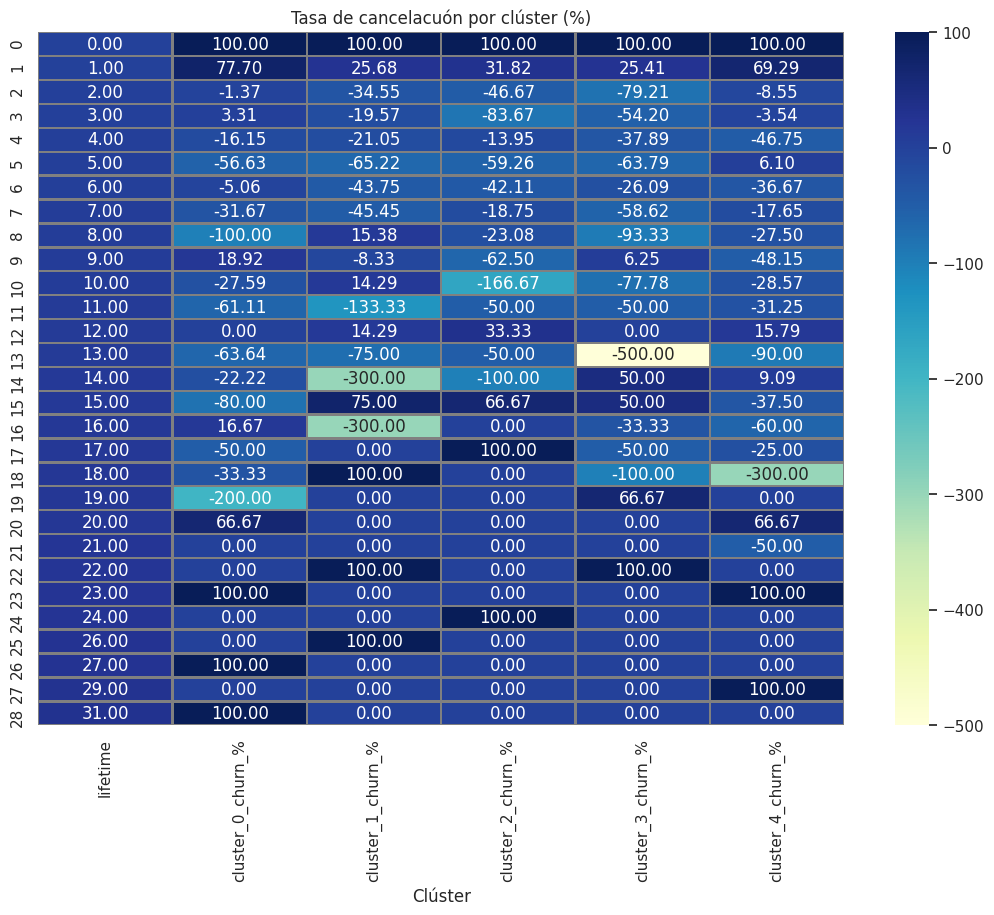

In [31]:
# Mapa de calor de la tasa de cancelación por clúster

sns.set(style='white')

plt.figure(figsize=(13, 9))

plt.title('Tasa de cancelacuón por clúster (%)')

sns.heatmap(tabla_churn, annot=True, fmt='.2f',
            linewidths=1, linecolor='gray', cmap='YlGnBu')

plt.xlabel('Clúster')

In [32]:
# Tasa de cancelación promedio por clúster

prom_churn = tabla_churn.drop('lifetime', axis=1)

prom_churn = prom_churn.mean().round(2).sort_values()

print('Tasa de cancelación promedio por clúster:')

print()

print(prom_churn)

Tasa de cancelación promedio por clúster:

cluster_3_churn_%   -28.48
cluster_1_churn_%   -17.30
cluster_4_churn_%   -11.87
cluster_2_churn_%    -9.82
cluster_0_churn_%    -5.71
dtype: float64


Comentarios:

* El clúster 0 tiene la mayor tasa de cancelación promedio con una tasa de pérdida del 24%.

El clúster cero engloba las siguientes características: usuarios hombres o mujeres, viven cerca del gimnasio, un porcentaje bajo se registra por el plan ‘partner’, no se registra por el plan ‘promo_friends’, comparte su teléfono, el periodo de contrato promedio es menor a dos meses, solo una tercera parte realiza actividades de grupo, edad promedio de 28 años, y su frecuencia de visita es 	muy cercana a 1 vez al mes.

* El clúster 2 tiene la menor tasa de cancelación con el 3.83%.

Estos usuarios son hombres y mujeres, viven cerca del gimnasio, 75% de estos llegan por el plan ‘partner’, casi la mitad por plan ‘promo friends’ , comparten su teléfono, el contrato promedio es cercano a los 12 meses, la mitad de ellos realiza actividades grupales, edad promedio de 30 años, y su visita promedio es de 2 veces al mes, cabe mencionar que este clúster es el que mas genera ingresos adicionales promedio.


## **Conclusiones**

**Probabilidad de cancelación.**

De acuerdo con los pronósticos realizados con el modelo de bosque aleatorio (el cual se considero de acuerdo con sus métricas ligeramente mejores que el de regresión logística) se encuentra que se tiene una probabilidad promedio del 26% de que un cliente cancele su registro en el gimnasio. Esta probabilidad es solo una visión general del total de clientes, ya que la probabilidad se determina por cliente y de acuerdo con las características definidas en el modelo. La característica más importante definida por el modelo es ‘lifetime’, es decir, el tiempo que lleva el usuario registrado en el gimnasio.

**Grupos objetivo.**

Al definir los clústeres (5) de los clientes (sin tomar en cuenta su clasificación ‘churn’) y calcular la tasa de cancelación encontramos características promedio a considerar para los clientes:

* **Clientes con mayor tasa de cancelación:**

Usuarios hombres o mujeres, viven cerca del gimnasio, un porcentaje bajo se registra por el plan ‘partner’, no se registra por el plan ‘promo_friends’, comparte su teléfono, el periodo de contrato promedio es menor a dos meses, solo una tercera parte realiza actividades de grupo, edad promedio de 28 años, y su frecuencia de visita es muy cercana a 1 vez al mes.

* **Clientes con menor tasa de cancelación:**

Usuarios hombres y mujeres, viven cerca del gimnasio, 75% de estos llegan por el plan ‘partner’, casi la mitad por plan ‘promo friends’, comparten su teléfono, el contrato promedio es cercano a los 12 meses, la mitad de ellos realiza actividades grupales, edad promedio de 30 años, y su visita promedio es de 2 veces al mes, cabe mencionar que este clúster es el que más genera ingresos adicionales promedio.

**Estrategias sugeridas.**

* **1. Atracción de nuevos clientes**

Objetivo: incrementar la base de usuarios

Atraer nuevos usuarios al gimnasio del perfil de baja tasa de cancelación.

Acciones: 

* Campañas de marketing digital enfocadas al perfil de usuarios con menor tasa de cancelación. 

* Uso de redes sociales crear contenidos relevantes para el mercado objetivo, deben incluir las opciones de actividades grupales, servicios extras y beneficios que obtienen si se registran por medio de una promoción ‘partner’ o  ‘promo friends’ así como los precios por registrarse en los períodos más amplios.

* Mercado objetivo basado en los demográficos del perfil, hombres y mujeres, edad 29-33 años, ubicación cercana o de fácil acceso al gimnasio.


* **2. Ampliar cobertura de los planes ‘partner’ y ‘promo_friends’**

Objetivo: incrementar base de usuarios y fidelizar los existentes.

Incentivar a los usuarios actuales del gimnasio a atraer nuevos usuarios a través de los planes promocionales vigentes, es decir, otorgar un beneficio extra a los usuarios que logren recomendar a un usuario nuevo. 

Acciones:

* Recompensas: Los usuarios de baja tasa de cancelación de igual forma muestran los ingresos extra mas importantes para el gimnasio, por lo que se recomienda otorgar un descuento en el consumo interno por cada usuario que logren atraer al gimnasio, lo cual a su vez generara mayor consumo interno. Por otra parte, se puede incentivar con un articulo promocional relevante para los usuarios. Se debe crear el caso de negocio para estimar el costo por nuevo usuario y el ROI correspondiente.

* Esta actividad, adicional a enfocarse a generar mayor cobertura de usuarios, tiene como objetivo crear sentido de afiliación a los usuarios actuales, siendo un diferenciador con los competidores.


* **3. Evitar la fuga.**

Objetivo: disminuir la probabilidad de cancelación.

Los usuarios con mayor tasa de cancelación regularmente solo asisten 1 mes y 1 vez al mes, sus contratos son mensuales, en consecuencia, el primer mes es crítico para la retención de clientes. 

Acciones:

* Apoyo inicial: ofrecer a los nuevos usuarios apoyo de entrenador 2 veces al mes por los primeros 3 meses. El entrenador debe estar capacitado para compartir la importancia de la asistencia a sus sesiones.

* ‘Gamification’: crear un esquema de logros por visita para los usuarios, otorgando una recompensa al cumplir con sus visitas después de los 3 meses, puede ser un descuento, un artículo publicitario o alguna clase personalizada sin costo.

* Agenda: asesorar a los nuevos usuarios en cómo organizar su agenda para acudir al gimnasio, con apoyo adicional de envío de recordatorios vía mensajes de texto.

* Tracking: dar seguimiento cada dos semanas con el usuario acerca de su satisfacción del gimnasio y/o recomendaciones para hacer su visita más efectiva.

* Post fuga: dar seguimiento a las razones de cancelación de la suscripción, se sugiere hacer un análisis de esto si se cuenta con la información para encontrar las principales razones de cancelación dadas por el usuario.


* **4. Implementar ‘Net promoter score (NPS)’**

Objetivo: medir la satisfacción de los usuarios

Se recomienda esta métrica para el gimnasio ya que ajusta para las necesidades de las estrategias anteriores.

NPS facilitara la identificación de los usuarios como ‘promotores’, ‘pasivos’ y ‘detractores’.

El contar con una métrica como NPS ayudara al gimnasio a tomar acciones concretas para la satisfacción de sus usuarios.

